In [3]:
import tensorflow as tf

### Create Tensors

In [4]:
scaler = tf.constant(7)
vector = tf.constant([1, 2, 3, 4, 5])
matrix = tf.constant([[1, 2], [3, 4], [5, 6]])

In [5]:
print('vector:', vector)
print('scaler:', scaler)
print('matrix:', matrix)

vector: tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
scaler: tf.Tensor(7, shape=(), dtype=int32)
matrix: tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


### Tensor operation

In [6]:
add = tf.add(vector, [10, 11, 12, 13, 14])
multiple = tf.multiply(matrix, 2)
reshaped = tf.reshape(matrix, [6, 1])

In [7]:
print(add)
print(multiple)
print(reshaped)

tf.Tensor([11 13 15 17 19], shape=(5,), dtype=int32)
tf.Tensor(
[[ 2  4]
 [ 6  8]
 [10 12]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]], shape=(6, 1), dtype=int32)


In [8]:
print("Added vector:", add.numpy())
print("Multiplied matrix:", multiple.numpy())
print("Reshaped matrix:", reshaped.numpy())

Added vector: [11 13 15 17 19]
Multiplied matrix: [[ 2  4]
 [ 6  8]
 [10 12]]
Reshaped matrix: [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


#### Tensorflow Fundamentals- Shapes, Dtypes, and gradients

In [9]:
a = tf.constant([[1, 2], [3, 4]], dtype=tf.int32)
b = tf.constant([[7, 8], [9, 10], [11, 12]], dtype=tf.float32)
print(a, b)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) tf.Tensor(
[[ 7.  8.]
 [ 9. 10.]
 [11. 12.]], shape=(3, 2), dtype=float32)


In [10]:
print('Shape of A: ', a.shape)
print('Shape of B: ', b.shape)

Shape of A:  (2, 2)
Shape of B:  (3, 2)


#### Broadcasting example

In [11]:
x = tf.constant([[1, 2], [6, 7]])
y = tf.constant(5)
print(x + y)
print(x * y)

tf.Tensor(
[[ 6  7]
 [11 12]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5 10]
 [30 35]], shape=(2, 2), dtype=int32)


#### Gradient example

In [12]:
x = tf.Variable([[1., 2.], [3., 4.]])
with tf.GradientTape() as tape:
    y = tf.reduce_sum(x ** 2)
dy_dx = tape.gradient(y, x)
print('dy/dx =', dy_dx.numpy())

dy/dx = [[2. 4.]
 [6. 8.]]


####  Build MNIST Model using Keras Functional API

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

In [17]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_functional_model')
model.summary()

Model: "mnist_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9876 - loss: 0.0363 - val_accuracy: 0.9818 - val_loss: 0.0810
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9815 - val_loss: 0.0850
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9873 - loss: 0.0370 - val_accuracy: 0.9807 - val_loss: 0.0801
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9877 - loss: 0.0374 - val_accuracy: 0.9811 - val_loss: 0.0801
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9878 - loss: 0.0348 - val_accuracy: 0.9809 - val_loss: 0.0809


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9809 - loss: 0.0809
Test accuracy: 0.9809


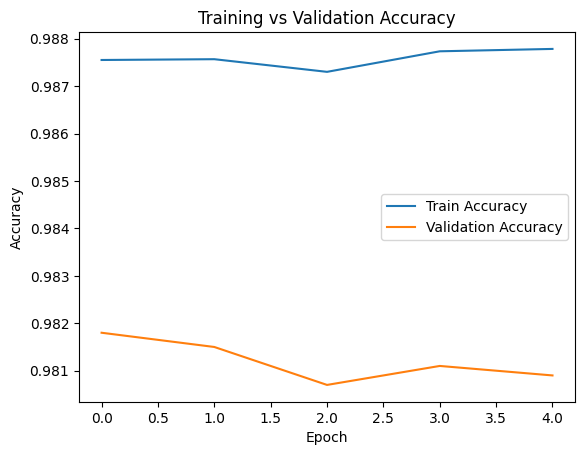

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()